In [1]:
import numpy as np
from astropy.io import fits

from pylab import *
%matplotlib notebook

In [69]:
fname = '/home/ban115/tmp/wed_debug_1.fits'
fname = '/home/ban115/tmp/wed_debug_noswap_2.fits'
fname = '/home/ban115/tmp/mp_test_pattern.fits'
fname = '/home/ban115/tmp//mp_dual_pol_real_data.fits'
f = open(fname, 'rb')

In [70]:
f.seek(0)
hdr = f.read(2880*3)
print(hdr)

b"SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [71]:
from craco.cardcap import get_single_packet_dtype
nant = 30
npol = 2
samp_per_int = 64 # samples per integration = 
samp_per_frame = 2048
int_per_frame = samp_per_frame // samp_per_int
nprod = nant*(nant+1)//2*npol 
print(f'nprod={nprod}')
dtype = get_single_packet_dtype(nprod, True)
packets_per_frame = int_per_frame * 36 * 4
print(packets_per_frame)
dtype

nprod=930
4608


dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (930, 2))])

In [72]:
f.seek(2880*3) #skip over the FITS header
packets = np.fromfile(f, dtype=dtype, count=4000*2*100)

<IPython.core.display.Javascript object>


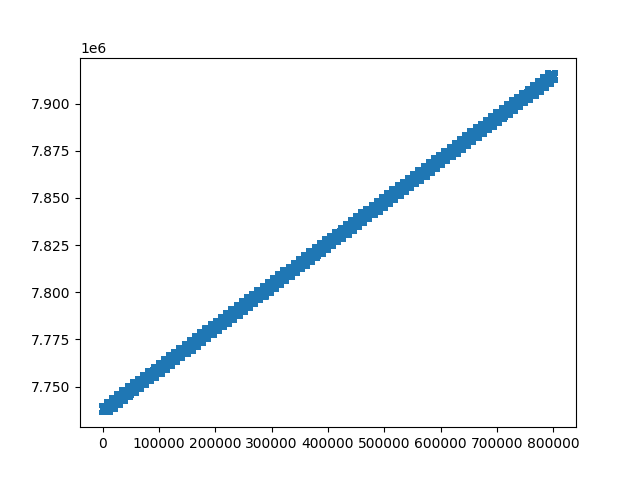

In [73]:
figure()
plot(packets['frame_id'],'x')


In [74]:
frame_id = packets['frame_id']
fdiff= frame_id[1:] - frame_id[:-1]
print(frame_id[0])
print(frame_id[packets_per_frame])
frame_id[packets_per_frame] - frame_id[0]

7737344
7737344


0

<IPython.core.display.Javascript object>


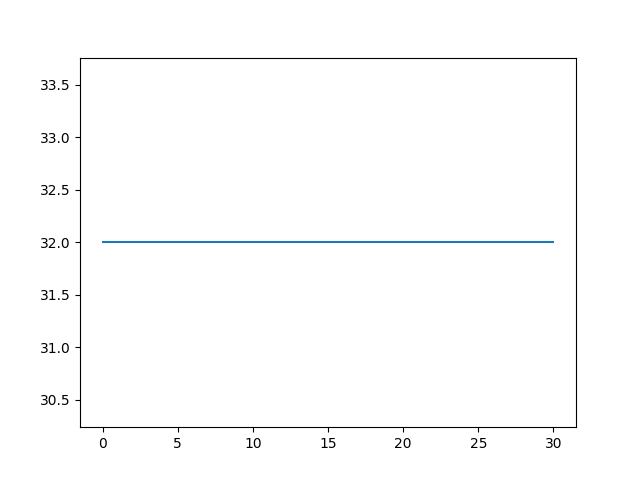

In [75]:
figure()

plot(fdiff[:31])

In [76]:
packets[0]

(7737344, 1025346946613, 0, 0, 0, 0, 930, 4, 0, 2004071455, 0, [[     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [-19264,  -4332], [  5706,  26050], [-16368, -30389], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], 

In [77]:
packets[30]

(7738304, 1025346946967, 0, 30, 0, 0, 930, 4, 0, 2004071455, 0, [[     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [ -9416,  30784], [ -1482,  26403], [ 23554,   4369], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0],

<IPython.core.display.Javascript object>


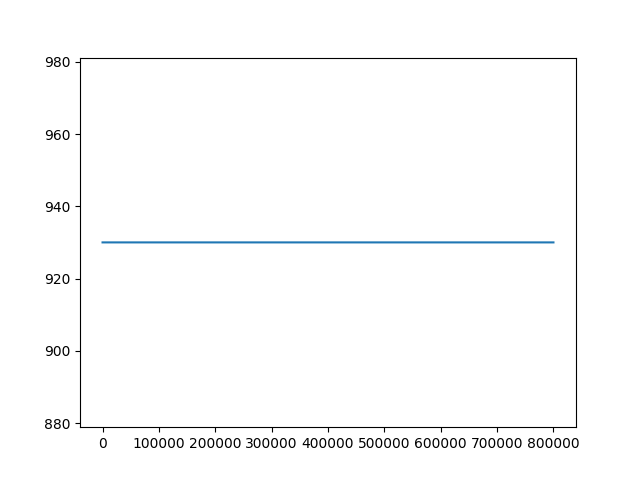

In [78]:
figure()

plot(packets['nprod'])

<IPython.core.display.Javascript object>


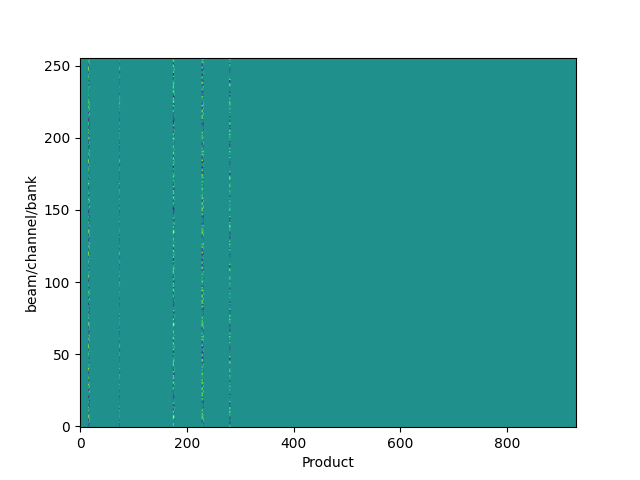

Text(0, 0.5, 'beam/channel/bank')

In [79]:
fig = figure()
imshow(packets['data'][:16*16,:,0], origin='lower', aspect='auto')
fig.fig_size_inches = (12,10)
xlabel('Product')
ylabel('beam/channel/bank')

<IPython.core.display.Javascript object>


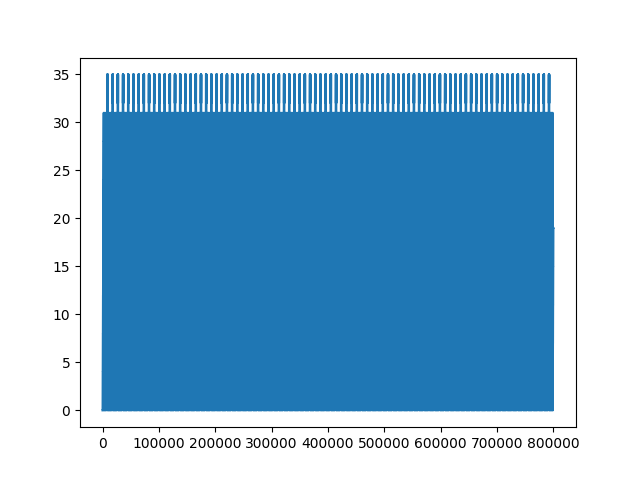

In [80]:
figure()
plot(packets['beam_number'])

In [81]:
nbytes=17289216

In [82]:
dtype.itemsize

3752

In [83]:
nbytes / dtype.itemsize

4608.0

In [84]:
npkts = 36*4*2048//32//2

In [85]:
npkts

4608

In [86]:
packets['frame_id'][:16]

array([7737344, 7737376, 7737408, 7737440, 7737472, 7737504, 7737536,
       7737568, 7737600, 7737632, 7737664, 7737696, 7737728, 7737760,
       7737792, 7737824], dtype=uint64)

In [87]:
dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (930, 2))])

In [88]:
list(map(hex, packets['frame_id'][:16]))

['0x761000',
 '0x761020',
 '0x761040',
 '0x761060',
 '0x761080',
 '0x7610a0',
 '0x7610c0',
 '0x7610e0',
 '0x761100',
 '0x761120',
 '0x761140',
 '0x761160',
 '0x761180',
 '0x7611a0',
 '0x7611c0',
 '0x7611e0']

In [89]:
import binascii
for ipkt in range(npkts*2):
    f.seek(2880*3 + ipkt*dtype.itemsize)
    b = f.read(48)
    print(f'{ipkt:04d}', binascii.hexlify(b))
    

0000 b'001076000000000035c670bbee00000000000000a20304001fb473770000000000000000000000000000000000000000'
0001 b'201076000000000041c670bbee00000000010000a20304001fb473770000000000000000000000000000000000000000'
0002 b'40107600000000004dc670bbee00000000020000a20304001fb473770000000000000000000000000000000000000000'
0003 b'601076000000000059c670bbee00000000030000a20304001fb473770000000000000000000000000000000000000000'
0004 b'801076000000000064c670bbee00000000040000a20304001fb473770000000000000000000000000000000000000000'
0005 b'a01076000000000070c670bbee00000000050000a20304001fb473770000000000000000000000000000000000000000'
0006 b'c0107600000000007cc670bbee00000000060000a20304001fb473770000000000000000000000000000000000000000'
0007 b'e01076000000000088c670bbee00000000070000a20304001fb473770000000000000000000000000000000000000000'
0008 b'001176000000000094c670bbee00000000080000a20304001fb473770000000000000000000000000000000000000000'
0009 b'20117600000000009fc670bbee00000000090000a2030400

1008 b'001676000000000011f570bbee0000000f300000a20304001fb473770000000000000000000000000000000000000000'
1009 b'20167600000000001df570bbee0000000f310000a20304001fb473770000000000000000000000000000000000000000'
1010 b'401676000000000028f570bbee0000000f320000a20304001fb473770000000000000000000000000000000000000000'
1011 b'601676000000000034f570bbee0000000f330000a20304001fb473770000000000000000000000000000000000000000'
1012 b'801676000000000040f570bbee0000000f340000a20304001fb473770000000000000000000000000000000000000000'
1013 b'a0167600000000004cf570bbee0000000f350000a20304001fb473770000000000000000000000000000000000000000'
1014 b'c01676000000000058f570bbee0000000f360000a20304001fb473770000000000000000000000000000000000000000'
1015 b'e01676000000000063f570bbee0000000f370000a20304001fb473770000000000000000000000000000000000000000'
1016 b'00177600000000006ff570bbee0000000f380000a20304001fb473770000000000000000000000000000000000000000'
1017 b'20177600000000007bf570bbee0000000f390000a2030400

1974 b'c016760000000000fc2171bbee0000001e360000a20304001fb473770000000000000000000000000000000000000000'
1975 b'e016760000000000082271bbee0000001e370000a20304001fb473770000000000000000000000000000000000000000'
1976 b'0017760000000000142271bbee0000001e380000a20304001fb473770000000000000000000000000000000000000000'
1977 b'2017760000000000202271bbee0000001e390000a20304001fb473770000000000000000000000000000000000000000'
1978 b'40177600000000002b2271bbee0000001e3a0000a20304001fb473770000000000000000000000000000000000000000'
1979 b'6017760000000000372271bbee0000001e3b0000a20304001fb473770000000000000000000000000000000000000000'
1980 b'8017760000000000432271bbee0000001e3c0000a20304001fb473770000000000000000000000000000000000000000'
1981 b'a0177600000000004f2271bbee0000001e3d0000a20304001fb473770000000000000000000000000000000000000000'
1982 b'c0177600000000005b2271bbee0000001e3e0000a20304001fb473770000000000000000000000000000000000000000'
1983 b'e017760000000000682271bbee0000001e3f0000a2030400

2996 b'8016760000000000835171bbee0000000e340100a20304001fb473770000000000000000000000000000000000000000'
2997 b'a0167600000000008f5171bbee0000000e350100a20304001fb473770000000000000000000000000000000000000000'
2998 b'c0167600000000009b5171bbee0000000e360100a20304001fb473770000000000000000000000000000000000000000'
2999 b'e016760000000000a65171bbee0000000e370100a20304001fb473770000000000000000000000000000000000000000'
3000 b'0017760000000000b25171bbee0000000e380100a20304001fb473770000000000000000000000000000000000000000'
3001 b'2017760000000000be5171bbee0000000e390100a20304001fb473770000000000000000000000000000000000000000'
3002 b'4017760000000000ca5171bbee0000000e3a0100a20304001fb473770000000000000000000000000000000000000000'
3003 b'6017760000000000d65171bbee0000000e3b0100a20304001fb473770000000000000000000000000000000000000000'
3004 b'8017760000000000e25171bbee0000000e3c0100a20304001fb473770000000000000000000000000000000000000000'
3005 b'a017760000000000ed5171bbee0000000e3d0100a2030400

4004 b'8014760000000000658071bbee0000001e240100a20304001fb473770000000000000000000000000000000000000000'
4005 b'a014760000000000708071bbee0000001e250100a20304001fb473770000000000000000000000000000000000000000'
4006 b'c0147600000000007c8071bbee0000001e260100a20304001fb473770000000000000000000000000000000000000000'
4007 b'e014760000000000888071bbee0000001e270100a20304001fb473770000000000000000000000000000000000000000'
4008 b'0015760000000000948071bbee0000001e280100a20304001fb473770000000000000000000000000000000000000000'
4009 b'2015760000000000a08071bbee0000001e290100a20304001fb473770000000000000000000000000000000000000000'
4010 b'4015760000000000ab8071bbee0000001e2a0100a20304001fb473770000000000000000000000000000000000000000'
4011 b'6015760000000000b78071bbee0000001e2b0100a20304001fb473770000000000000000000000000000000000000000'
4012 b'8015760000000000c38071bbee0000001e2c0100a20304001fb473770000000000000000000000000000000000000000'
4013 b'a015760000000000cf8071bbee0000001e2d0100a2030400

5000 b'0011760000000000b8ae71bbee0000000e080200a20304001fb473770000000000000000000000000000000000000000'
5001 b'2011760000000000c4ae71bbee0000000e090200a20304001fb473770000000000000000000000000000000000000000'
5002 b'4011760000000000d0ae71bbee0000000e0a0200a20304001fb473770000000000000000000000000000000000000000'
5003 b'6011760000000000dcae71bbee0000000e0b0200a20304001fb473770000000000000000000000000000000000000000'
5004 b'8011760000000000e8ae71bbee0000000e0c0200a20304001fb473770000000000000000000000000000000000000000'
5005 b'a011760000000000f3ae71bbee0000000e0d0200a20304001fb473770000000000000000000000000000000000000000'
5006 b'c011760000000000ffae71bbee0000000e0e0200a20304001fb473770000000000000000000000000000000000000000'
5007 b'e0117600000000000baf71bbee0000000e0f0200a20304001fb473770000000000000000000000000000000000000000'
5008 b'001276000000000017af71bbee0000000e100200a20304001fb473770000000000000000000000000000000000000000'
5009 b'201276000000000023af71bbee0000000e110200a2030400

5974 b'c01276000000000002dc71bbee0000001d160200a20304001fb473770000000000000000000000000000000000000000'
5975 b'e0127600000000000edc71bbee0000001d170200a20304001fb473770000000000000000000000000000000000000000'
5976 b'00137600000000001adc71bbee0000001d180200a20304001fb473770000000000000000000000000000000000000000'
5977 b'201376000000000026dc71bbee0000001d190200a20304001fb473770000000000000000000000000000000000000000'
5978 b'401376000000000031dc71bbee0000001d1a0200a20304001fb473770000000000000000000000000000000000000000'
5979 b'60137600000000003ddc71bbee0000001d1b0200a20304001fb473770000000000000000000000000000000000000000'
5980 b'801376000000000049dc71bbee0000001d1c0200a20304001fb473770000000000000000000000000000000000000000'
5981 b'a01376000000000055dc71bbee0000001d1d0200a20304001fb473770000000000000000000000000000000000000000'
5982 b'c01376000000000061dc71bbee0000001d1e0200a20304001fb473770000000000000000000000000000000000000000'
5983 b'e0137600000000006ddc71bbee0000001d1f0200a2030400

7000 b'0013760000000000b80b72bbee0000000d180300a20304001fb473770000000000000000000000000000000000000000'
7001 b'2013760000000000c40b72bbee0000000d190300a20304001fb473770000000000000000000000000000000000000000'
7002 b'4013760000000000d00b72bbee0000000d1a0300a20304001fb473770000000000000000000000000000000000000000'
7003 b'6013760000000000dc0b72bbee0000000d1b0300a20304001fb473770000000000000000000000000000000000000000'
7004 b'8013760000000000e80b72bbee0000000d1c0300a20304001fb473770000000000000000000000000000000000000000'
7005 b'a013760000000000f30b72bbee0000000d1d0300a20304001fb473770000000000000000000000000000000000000000'
7006 b'c013760000000000ff0b72bbee0000000d1e0300a20304001fb473770000000000000000000000000000000000000000'
7007 b'e0137600000000000b0c72bbee0000000d1f0300a20304001fb473770000000000000000000000000000000000000000'
7008 b'0014760000000000170c72bbee0000000d200300a20304001fb473770000000000000000000000000000000000000000'
7009 b'2014760000000000230c72bbee0000000d210300a2030400

8028 b'8013760000000000863b72bbee0000001d1c0300a20304001fb473770000000000000000000000000000000000000000'
8029 b'a013760000000000923b72bbee0000001d1d0300a20304001fb473770000000000000000000000000000000000000000'
8030 b'c0137600000000009e3b72bbee0000001d1e0300a20304001fb473770000000000000000000000000000000000000000'
8031 b'e013760000000000aa3b72bbee0000001d1f0300a20304001fb473770000000000000000000000000000000000000000'
8032 b'0014760000000000b53b72bbee0000001d200300a20304001fb473770000000000000000000000000000000000000000'
8033 b'2014760000000000c13b72bbee0000001d210300a20304001fb473770000000000000000000000000000000000000000'
8034 b'4014760000000000cd3b72bbee0000001d220300a20304001fb473770000000000000000000000000000000000000000'
8035 b'6014760000000000d93b72bbee0000001d230300a20304001fb473770000000000000000000000000000000000000000'
8036 b'8014760000000000e53b72bbee0000001d240300a20304001fb473770000000000000000000000000000000000000000'
8037 b'a014760000000000f03b72bbee0000001d250300a2030400

9032 b'0011760000000000386a72bbee00000021080300a20304001fb473770000000000000000000000000000000000000000'
9033 b'2011760000000000446a72bbee00000021090300a20304001fb473770000000000000000000000000000000000000000'
9034 b'4011760000000000506a72bbee000000210a0300a20304001fb473770000000000000000000000000000000000000000'
9035 b'60117600000000005c6a72bbee000000210b0300a20304001fb473770000000000000000000000000000000000000000'
9036 b'8011760000000000686a72bbee000000210c0300a20304001fb473770000000000000000000000000000000000000000'
9037 b'a011760000000000736a72bbee000000210d0300a20304001fb473770000000000000000000000000000000000000000'
9038 b'c0117600000000007f6a72bbee000000210e0300a20304001fb473770000000000000000000000000000000000000000'
9039 b'e0117600000000008b6a72bbee000000210f0300a20304001fb473770000000000000000000000000000000000000000'
9040 b'0012760000000000976a72bbee00000021100300a20304001fb473770000000000000000000000000000000000000000'
9041 b'2012760000000000a36a72bbee00000021110300a2030400

In [90]:
hex(930)

'0x3a2'

In [91]:
hex(packets[0]['nprod'])

'0x3a2'

In [92]:
print(packets[100].copy())

(7738496, 1025346947800, 1, 36, 0, 0, 930, 4, 0, 2004071455, 0, [[     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [ 17732,   3424], [-29641, -13219], [ 10408,  16643], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0],

In [93]:
ipkt = 0
f.seek(2880*3 + ipkt*dtype.itemsize)
b = f.read(32)
binascii.hexlify(b)

b'001076000000000035c670bbee00000000000000a20304001fb4737700000000'

In [94]:
binascii.hexlify(b[20:26])

b'a20304001fb4'

In [95]:
f.seek(2880*3)

8640

In [96]:
packets[0]

(7737344, 1025346946613, 0, 0, 0, 0, 930, 4, 0, 2004071455, 0, [[     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [-19264,  -4332], [  5706,  26050], [-16368, -30389], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], [     0,      0], 

In [97]:
dtype

dtype([('frame_id', '<u8'), ('bat', '<u8'), ('beam_number', 'u1'), ('sample_number', 'u1'), ('channel_number', 'u1'), ('fpga_id', 'u1'), ('nprod', '<u2'), ('flags', 'u1'), ('zero1', 'u1'), ('version', '<u4'), ('zero3', '<u4'), ('data', '<i2', (930, 2))])

In [98]:
packets_per_frame

4608

In [99]:
packets['sample_number'][:64]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=uint8)

In [102]:
packets['channel_number'][:64*36]

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [104]:
nant = 30
addr = 0
addrmap = {}
for a1 in range(nant):
    for a2 in range(a1, nant):
        addrmap[addr] = (a1+1, a2+1)
        addr += 1


<IPython.core.display.Javascript object>


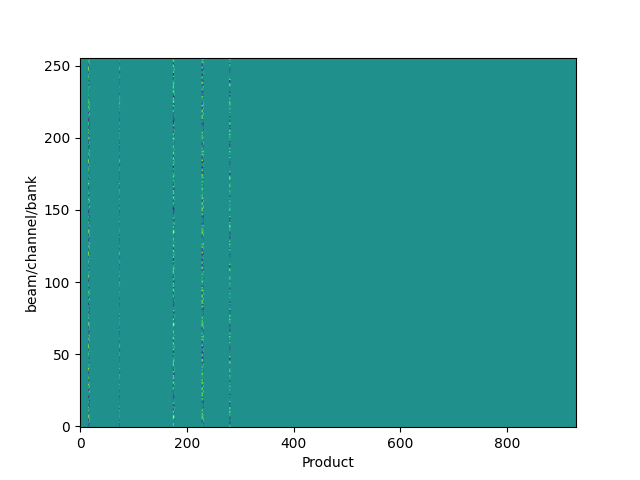

Text(0, 0.5, 'beam/channel/bank')

In [105]:
fig = figure()
imshow(packets['data'][:16*16,:,0], origin='lower', aspect='auto')
fig.fig_size_inches = (12,10)
xlabel('Product')
ylabel('beam/channel/bank')

In [116]:
preal = packets['data'][0,:,0]
pimag = packets['data'][0,:,1]
print(np.unique(preal))



for addr in np.where(preal!=0)[0]:
    
    if addr %2 == 0:
        pol='A'
    else:
        pol='B'
        
    bladdr = addr // 2
        
        
    print(f'RAM address={addr} pol={pol} baseline={addrmap[bladdr]} real={preal[addr]} imag={pimag[addr]}')

[-19264 -16368      0   2815   5706   9272  10698  24341]
RAM address=15 pol=B baseline=(1, 8) real=-19264 imag=-4332
RAM address=16 pol=A baseline=(1, 9) real=5706 imag=26050
RAM address=17 pol=B baseline=(1, 9) real=-16368 imag=-30389
RAM address=74 pol=A baseline=(2, 9) real=-19264 imag=-4332
RAM address=174 pol=A baseline=(4, 4) real=2815 imag=0
RAM address=175 pol=B baseline=(4, 4) real=2815 imag=0
RAM address=176 pol=A baseline=(4, 5) real=5706 imag=-26050
RAM address=228 pol=A baseline=(5, 5) real=10698 imag=0
RAM address=229 pol=B baseline=(5, 5) real=9272 imag=0
RAM address=231 pol=B baseline=(5, 6) real=-16368 imag=30389
RAM address=280 pol=A baseline=(6, 6) real=24341 imag=0
RAM address=281 pol=B baseline=(6, 6) real=24341 imag=0


In [108]:
packets['nprod'][:16]

array([930, 930, 930, 930, 930, 930, 930, 930, 930, 930, 930, 930, 930,
       930, 930, 930], dtype=uint16)